# Notebook 4: Probability Intuition and Random Simulation 
***

In this notebook you'll see how we can use Numpy to run simple probability simulations to estimate probabilities and  to gain intuition about random processes and to check your pencil and paper work.  Later in the course we'll talk about how to implement and analyze an important random simulation technique called Monte Carlo. 

We'll need Numpy and Matplotlib for this notebook, so let's load and setup those libraries. 

In [1]:
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline

### Estimating Simple Probabilities 
*** 

In this example we'll see how we can use the Numpy function [random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) to make random draws from a sample space and estimate the probability of certain random events. As a simple example, consider a fair coin.  We can represent the sample space for this coin with a Numpy array with two entries: "H" and "T"

In [2]:
coin = np.array(["H", "T"])
print(coin)

['H' 'T']


We can simulate flipping the coin using np.random.choice, which returns a randomly selected entry from a Numpy array.  If no optional parameters are passed in, np.random.choice assigns an **equal probability** to each entry of the array.   

In [18]:
for ii in range(5):
    print(np.random.choice(coin), end=" ")

H H H H H 

We can simulate many flips of the coin and store the results in an array by passing the size parameter to np.random.choice. 

In [19]:
flips = np.random.choice(coin, size=10)
print(flips)

['T' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'T' 'H']


Now suppose we want to run a simple simulation to estimate the probability  that the coin comes up Heads (which we expect to be $0.5$ because the coin is fair).  One way to do this is to do a large number of coin flips and then divide the number of flips that come up Heads by the total number of flips. The following code flips the coin 50 times and computes the desired ratio: 

In [50]:
np.random.seed(12345)
flips = np.random.choice(coin, size=50)
approx_prob_heads = np.sum(flips == "H") / len(flips)
print("the probability of heads is approximately {:.3f}".format(approx_prob_heads))

the probability of heads is approximately 0.360


OK, so the simulation estimated that the probability of the coin coming up heads is $0.36$, which is pretty far off from the $0.5$ that we expected.  This is likely because we didn't do very many coin flips.  Let's see what happens if we rerun the simulation with $500$ coin flips. 

In [73]:
flips = np.random.choice(coin, size=500)
approx_prob_heads = np.sum(flips == "H") / len(flips)
print("the probability of heads is approximately {:.3f}".format(approx_prob_heads))

the probability of heads is approximately 0.498


With $500$ coin flips our estimate came out to be $0.512$, which seems much better.  It's an interesting exercise to make a plot of the running estimate of the probability as the number of coin flips increases.  We'll use the same random sequence of coin flips from the previous simulation.  


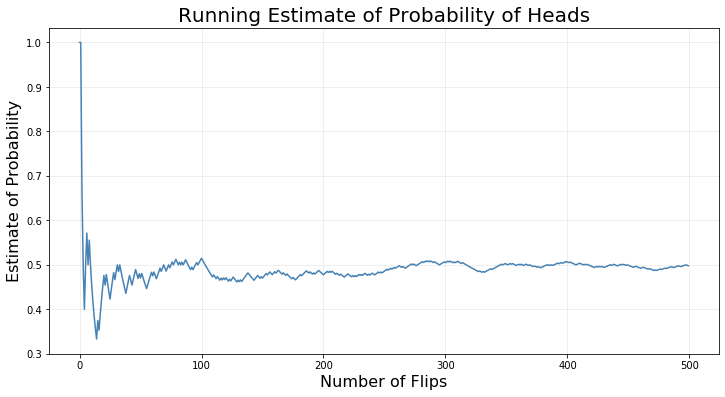

In [74]:
p = np.zeros(len(flips))
for ii in range(len(p)):
    p[ii] = np.sum(flips[:ii+1] == "H") / len(flips[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Running Estimate of Probability of Heads", fontsize=20)
ax.set_xlabel("Number of Flips", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

Notice that for very few flips the estimate of the probability is understandably poor.  But as the number of flips increases the estimate settles down to very close to the expected $0.5$. 

### Exercise 1 - The Biased Coin
***

Now let's make it more interesting by considering a biased coin where the probability of the coin landing heads is $0.75$.  We can alter the probability with which np.random.choice selects a particular entry of the sample space array by passing in an optional array of probabilities, e.g. p = [0.75, 0.25].  Rerun the simulation from above with the biased coin by passing in such an array of probabilities into np.random.choice. Does your running estimate of the probability of Heads seem to settle down to $0.75$ as expected?  If not, try increasing the number of coin flips until it does. 

the probability of heads is approximately 0.750


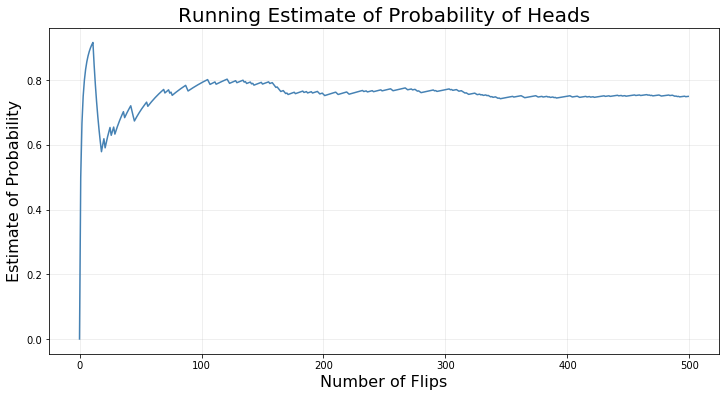

In [76]:
biased_flips = np.random.choice(coin, size=500, p=[0.75,0.25])
approx_prob_heads = np.sum(biased_flips == "H") / len(biased_flips)
print("the probability of heads is approximately {:.3f}".format(approx_prob_heads))
p = np.zeros(len(biased_flips))
for ii in range(len(p)):
    p[ii] = np.sum(biased_flips[:ii+1] == "H") / len(biased_flips[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.set_title("Running Estimate of Probability of Heads", fontsize=20)
ax.set_xlabel("Number of Flips", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

### Exercise 2 - Double Heads
***

In class we showed that the probability of flipping two fair coins and getting two Heads was $\frac{1}{4}$.  Write a simple simulation to estimate this probability. Does your estimate from your simulation agree with the pencil-and-paper results? 

In [79]:
two_coins = np.array(["HH", "HT", "TH", "TT"]) # first line for free!
flip1 = np.random.choice(two_coins)
flip2 = np.random.choice(two_coins)
results = flip1 + flip2
print("The results are: {}".format(results))

The results are: TTHH


### Exercise 3 - Roll the Easy Seven
***

Suppose you roll a pair of fair six-sided dice.

**First:** Compute the probability that the two rolls sum to $7$ by hand. 

In [ ]:
outcomes = [(1,1),(1,2),(1,3)]

In [ ]:
sum(outcomes[0])==7

**Second:** Now, write a simple simulation to estimate the probability. 

In [ ]:
die = np.array([1,2,3,4,5,6]) # first line for free!


### Exercise 4 - Number of Flips Until Double Heads
***

Later we'll see that we can use probabilities to compute average quantities of interest.  For instance, we could compute the average number of coin flips we have to do until we flip two Heads in a row.  Can you write a simulation to estimate this? Can you extend this to $m$ Heads in a row? 

This estimate of the average number of flips to obtain 2 Heads is our **Monte Carlo** estimate.  In a nutshell, any time we sample something many, many times and average the results, we are obtaining a [Monte Carlo estimate](https://en.wikipedia.org/wiki/Monte_Carlo_method).


### Exercise 5 - Estimating $\pi$
***

We can obtain an empirical estimate of the value of $\pi$ through the magic of simulation!

<img src="https://www.smbc-comics.com/comics/1527520359-soonish42.png" style="width: 300px;"/>

S'pose the radius of the circle is $r$.  Then the area of the square is $4r \times 4r  = 16r^2$, and the area of the circle is $\pi r^2$.  So, the ratio of the area of the circle to that of the square is $$\frac{\pi r^2}{16r^2} = \frac{\pi}{16}$$

So how does that help us to estimate $\pi$?

Well, if we fire a whole bunch of arrows at that square, then roughly $\frac{\pi}{16}$ of the arrows should land in the circle. That means that if $n_c$ arrows out of $n$ arrows total land in the circle, then $$\frac{\pi}{16} \approx \frac{n_c}{n}$$

Rearranging this, our estimate of $\pi$ is:  $$\pi \approx 16\times \frac{n_c}{n}$$

Alright, we're almost ready to start shooting arrows at this dude. S'pose the square extends from $-1 \leq x \leq 1$ and $-1 \leq y \leq 1$.  Then the equation of this circle, centered at $(-0.5, 0.5)$ and with radius $0.5$, is:
$$(x+0.5)^2 + (y-0.5)^2 = 0.25$$

We can check if an arrow strike is inside the circle by first checking that the $x$ coordinate is between $-1$ and $0$, and then checking that the $y$ coordinate of the arrow is between:
$$0.5 - \sqrt{0.25 - (x+0.5)^2} \leq y \leq 0.5 + \sqrt{0.25 - (x+0.5)^2}$$

If both of these conditions are satisfied, then the arrow is inside the circle.

First, finish off this function that I started, to take in the $x$- and $y$- coordinates of an arrow, and return True/False, depending on whether or not the arrow is within the circle.

In [55]:
def in_circle(x,y):
    # check if the arrow's x-coordinate could be within the circle
    in_x =  # TODO
    if in_x:
        # only if the x-coordinate is good, should we check the y-coordinate
        in_y =  # TODO
        return in_x and in_y
    else:
        return in_x

SyntaxError: invalid syntax (<ipython-input-55-c692adc084b7>, line 3)

Now, write a simulation to shoot $n$ arrows at that square and return your estimate of $\pi$. Make a plot of the running estimate of $\pi$ as a function of the number of arrows.

*Hint: the Numpy `np.random.uniform` method might be useful for shooting the arrows.*

### Exercise 6 - The Birthday Game 
***

The so-called Birthday Paradox tells us that if there are more than $70$ people in the room, there is a $99.9\%$ chance that at least two people have the same birthday.  It turns out that _paradox_ is a misnomer, because the facts of the problem are very clear after a bit of probability analysis.  We'll talk about this problem in detail in class on Wednesday, but for now we can simulate it and get some intuition.  

The following code does all the work for you.  You just need to play around with it and see how it works.  

- The function random_bday( ) returns a string representing a valid birthday in a non-leap year. 

- The function birthday_game(...) assigns $n$ birthdays randomly and then checks if there is a birthday match.  

- The function birthday_sim(...) runs many trials of the birthday game and returns the fraction of trials in which there was a birthday match. 

Try running birthday_sim(...) for various numbers of people and number of trials and look at the results!  What is the probability that two people in our class have the same birthday?

In [ ]:
def random_bday():
    
    # Dictionary telling how many days are in each month  
    days_in_month = {"Jan" : 31, "Feb" : 28, "Mar" : 31, "Apr" : 30, "May" : 31, "Jun" : 30, "Jul" : 31, "Aug" : 31, 
                     "Sep" : 30, "Oct" : 31, "Nov" : 30, "Dec" : 31}
    # Array of months 
    months = np.array(list(days_in_month.keys()))
    
    # Probability of randomly selecting each month 
    month_probs = np.array(list(days_in_month.values()))/365
    
    # Draw random month 
    m = np.random.choice(months, p=month_probs)
    
    # Draw random day of month 
    d = np.random.choice(range(1,days_in_month[m]+1))
    
    return m + " " + str(d)
    

In [ ]:
def birthday_game(num_people):
    
    # draw random birthday for each person in the room 
    birthdays = [random_bday() for ii in range(num_people)]
    
    # check if there is a birthday match 
    return True if len(set(birthdays)) < len(birthdays) else False 


In [ ]:
def birthday_sim(num_people, num_trials=1000):
    
    # Simulate num_trials of the birthday game 
    random_rooms = [birthday_game(num_people) for ii in range(num_trials)]
    
    # Print fraction of trials where birthday match occurred 
    print('The approximate probability of a birthday match in a room of {} people is {:.16f}'.format(num_people,np.sum(random_rooms)/num_trials))